<a href="https://colab.research.google.com/github/KrisDA-1/NU_Pandas/blob/main/BD_Drug_related_deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Big Data Analysis Using Python

##Research Questions

####
RQ1:

How have accidental drug-related deaths changed over time from 2012 to 2024?

RQ2:

Is there an association between demographic factors (age, sex, race, ethnicity) and the likelihood of fentanyl involvement in accidental drug-related deaths?

RQ3:

Are certain counties or cities experiencing disproportionately high rates of multi-drug involvement deaths?

RQ4:

Does age differ significantly between deaths involving opioids and those not involving opioids?

##Hypothesis

####
H₀:

The proportion of fentanyl-involved deaths has remained constant over time from 2012 to 2024.

H₁:

The proportion of fentanyl-involved deaths has increased significantly over time from 2012 to 2024.

##Data Exploration

In [1]:
#Importing libraries

# --- Core Data Manipulation & Mathematics ---
import numpy as np #Used for handling multi-dimensional arrays, matrices, and high-level mathematical functions.
import pandas as pd #Used to creating DataFrames, reading files (CSV, Excel), and cleaning data.

# --- Visualization Libraries ---
import missingno as msno #A specialized library specifically for visualizing missing values (NaNs)
import matplotlib.pyplot as plt #Used for creating static, basic charts and customizing plot details (figures, axes, sizes)
import seaborn as sns #used for making statistical graphics look attractive and informative with less code.
import plotly.graph_objs as go #Custom dashboards
import plotly.express as px #Used for creating complex, interactive plots (with zoom/hover) very quickly


# --- Machine Learning & Preprocessing ---
from sklearn.impute import KNNImputer #A strategy for filling in missing data. It replaces NaNs based on the values of the 'k' nearest neighbors found in the training set
from sklearn.linear_model import LinearRegression #A basic predictive model. Used to model the relationship between a scalar response and one or more explanatory variables.

# --- Statistics & Hypothesis Testing ---
import scipy.stats as stats #The primary module for probability distributions and statistical functions.

# --- Specific Math Utilities ---
from numpy import median #Specific import to calculate the median (middle value) of a dataset.
from numpy import std #Specific import to calculate standard deviation (spread of data).


In [2]:
# Set plotting style
sns.set(style="whitegrid")

##>>Initial Exploration

In [3]:
# Construct the full path to the selected CSV file
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/BD/Accidental_Drug_Related_Deaths_2012-2024.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first 5 rows of the DataFrame
display(df.head())

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,01/02/2023,Date of death,65.0,Male,White,"No, not Spanish/Hispanic/Latino",BRIDGEPORT,FAIRFIELD,CT,BRIDGEPORT,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"BRIDGEPORT, CT\n(41.179195, -73.189476)","BRIDGEPORT, CT\n(41.179195, -73.189476)","CT\n(41.57350273, -72.738305908)"
1,01/18/2023,Date of death,42.0,Male,White,"No, not Spanish/Hispanic/Latino",WATERBURY,NEW HAVEN,CT,FARMINGTON,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"WATERBURY, CT\n(41.5542609, -73.0430692)","FARMINGTON, CT\n(41.726536, -72.8250564)","CT\n(41.57350273, -72.738305908)"
2,01/26/2022,Date of death,34.0,Male,White,NaN,BROOKFIELD,FAIRFIELD,CT,BROOKFIELD,...,Y,NaN,NaN,Y,NaN,Y,NaN,"BROOKFIELD, CT\n(41.46736000000004, -73.398259...","BROOKFIELD, CT\n(41.46736000000004, -73.398259...","CT\n(41.57350273000003, -72.73830590799997)"
3,02/04/2023,Date of death,34.0,Male,White,NaN,NaN,NaN,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"CT\n(41.57350273, -72.738305908)","NEW HAVEN, CT\n(41.3082517, -72.9241605)","CT\n(41.57350273, -72.738305908)"
4,02/18/2022,Date of death,43.0,Male,White,NaN,NORWICH,NEW LONDON,CT,NORWICH,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"NORWICH, CT\n(41.526760000000024, -72.07567999...","NORWICH, CT\n(41.526760000000024, -72.07567999...","CT\n(41.57350273000003, -72.73830590799997)"


In [14]:
##Understanding our dataset
print("\n--- Dataset Shape ---\n", df.shape)
print("\n--- Columns ---\n", df.columns.tolist())
print("\n--- Data Types ---\n", df.dtypes)
print("\n--- Missing Values ---\n", df.isnull().sum())
print("\n--- Summary Statistics ---\n", df.describe(include='all')) #Statistics of all columns


--- Dataset Shape ---
 (12963, 49)

--- Columns ---
 ['Date', 'Date Type', 'Age', 'Sex', 'Race', 'Ethnicity', 'Residence City', 'Residence County', 'Residence State', 'Injury City', 'Injury County', 'Injury State', 'Injury Place', 'Description of Injury', 'Death City', 'Death County', 'Death State', 'Location', 'Location if Other', 'Cause of Death', 'Manner of Death', 'Other Significant Conditions ', 'Heroin', 'Heroin death certificate (DC)', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)', 'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine', 'Other Opioid', 'Any Opioid', 'Other', 'ResidenceCityGeo', 'InjuryCityGeo', 'DeathCityGeo', 'Year']

--- Data Types ---
 Date                             datetime64[ns]
Date Type                                object
Age                                     float64
Sex         

In [10]:
##View Dataframe info
print("\n--- BASIC INFO ---")
print(df.info())


--- BASIC INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12963 entries, 0 to 12962
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           12963 non-null  object 
 1   Date Type                      12963 non-null  object 
 2   Age                            12961 non-null  float64
 3   Sex                            12954 non-null  object 
 4   Race                           12897 non-null  object 
 5   Ethnicity                      3435 non-null   object 
 6   Residence City                 12320 non-null  object 
 7   Residence County               11655 non-null  object 
 8   Residence State                10927 non-null  object 
 9   Injury City                    12706 non-null  object 
 10  Injury County                  9527 non-null   object 
 11  Injury State                   9849 non-null   object 
 12  Injury Place              

In [11]:
#Display statistics of numeric variables
pd.options.display.float_format = "{:.2f}".format
df.describe()

,Age
count,12961.00
mean,44.35
std,12.71
min,13.00
25%,34.00
50%,44.00
75%,55.00
max,87.00


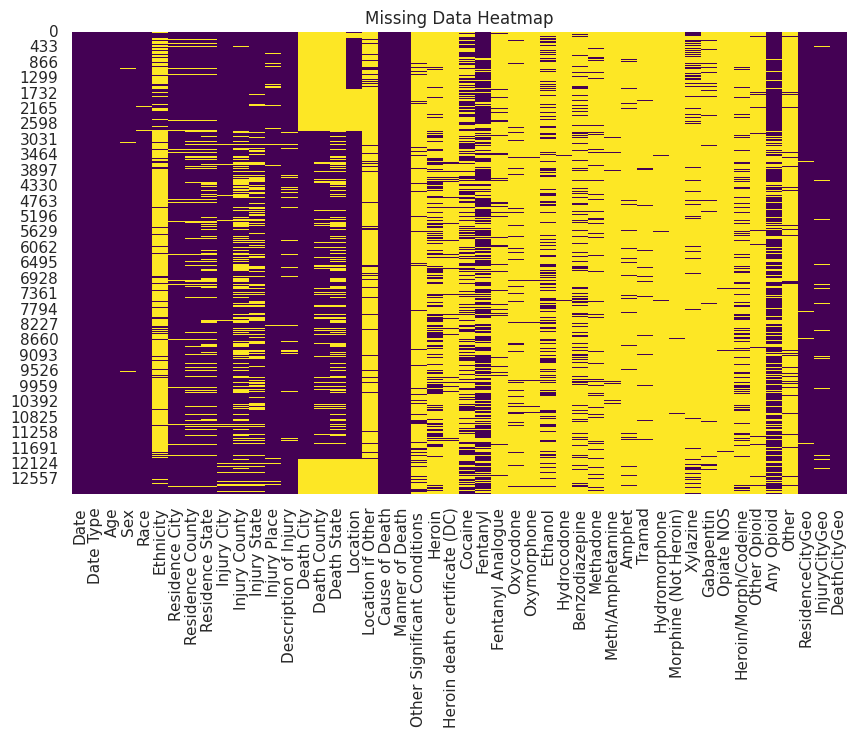

In [12]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

##>>Pre-processing and cleaning

In [13]:
# Convert Date column to datetime amd extract year
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year

In [15]:
# Handle missing values: Drop rows with missing critical fields (e.g., Age, Sex, Year)
df = df.dropna(subset=['Age', 'Sex', 'Year'])

In [16]:
# Convert Age to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [17]:
# Standardize categorical columns (e.g., Sex, Race, Ethnicity)
df['Sex'] = df['Sex'].str.strip().str.upper()
df['Race'] = df['Race'].str.strip().str.title()
df['Ethnicity'] = df['Ethnicity'].str.strip().str.title()

In [18]:
# Create binary columns for substance involvement (assuming columns like 'Fentanyl', 'Heroin', etc.)
# If a column indicates presence (e.g., 'Y' or 'Yes'), convert to 1; else 0
substance_cols = ['Fentanyl', 'Heroin', 'Cocaine', 'Oxycodone', 'Methadone', 'Benzodiazepine']  # Adjust based on actual columns
for col in substance_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.upper().map({'Y': 1, 'YES': 1, '1': 1}).fillna(0).astype(int)

In [20]:
# Create 'Opioids_Involved' (e.g., if any opioid-related substance is present)
opioid_cols = ['Fentanyl', 'Heroin', 'Oxycodone', 'Methadone']
df['Opioids_Involved'] = df[opioid_cols].max(axis=1)  # 1 if any opioid is involved


In [21]:
# Create 'Multi_Drug_Involved' (e.g., if more than one substance is involved)
df['Multi_Drug_Involved'] = (df[substance_cols].sum(axis=1) > 1).astype(int)

In [22]:
# Filter for accidental deaths only (if 'Manner of Death' column exists)
if 'Manner of Death' in df.columns:
    df = df[df['Manner of Death'].str.contains('Accident', case=False, na=False)]

In [23]:
# Remove duplicates and create a new dataset
df_clean = df.drop_duplicates()

print("Cleaned Dataset Shape:", df_clean.shape)

Cleaned Dataset Shape: (12928, 51)


##>>Handling Outliers

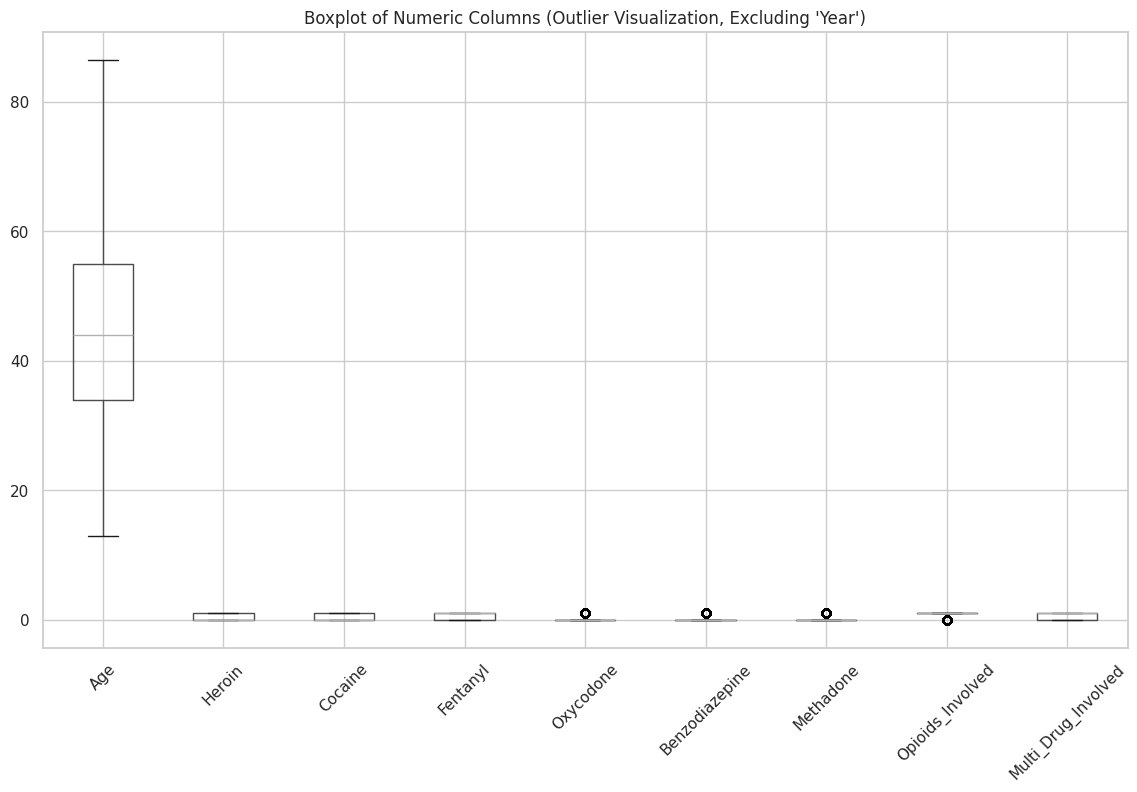

In [71]:
# Exclude 'year' from numeric_cols if present
numeric_cols_excluded = [col for col in numeric_cols if col.lower() != 'year']

# Create boxplots for each numeric column (excluding 'year')
plt.figure(figsize=(14, 8))
df_clean[numeric_cols_excluded].boxplot()
plt.title("Boxplot of Numeric Columns (Outlier Visualization, Excluding 'Year')")
plt.xticks(rotation=45)
plt.show()

In [44]:
# Detect outliers in Age using IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [46]:
#IQR-based Outlier detection function
def find_outliers_iqr(data, column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

In [48]:
# Select numeric columns to iterate through for outlier detection
numeric_cols = df_clean.select_dtypes(include=['number']).columns

for col in numeric_cols:
    lb, ub = find_outliers_iqr(df_clean, col)
    print(f"{col}: Lower={lb}, Upper={ub}")

Age: Lower=2.5, Upper=86.5
Heroin: Lower=-1.5, Upper=2.5
Cocaine: Lower=-1.5, Upper=2.5
Fentanyl: Lower=-1.5, Upper=2.5
Oxycodone: Lower=0.0, Upper=0.0
Benzodiazepine: Lower=0.0, Upper=0.0
Methadone: Lower=0.0, Upper=0.0
Year: Lower=2009.5, Upper=2029.5
Opioids_Involved: Lower=1.0, Upper=1.0
Multi_Drug_Involved: Lower=-1.5, Upper=2.5


In [49]:
# Cap outliers: Replace values outside bounds with the bounds
df_clean['Age_Capped'] = np.clip(df_clean['Age'], lower_bound, upper_bound)

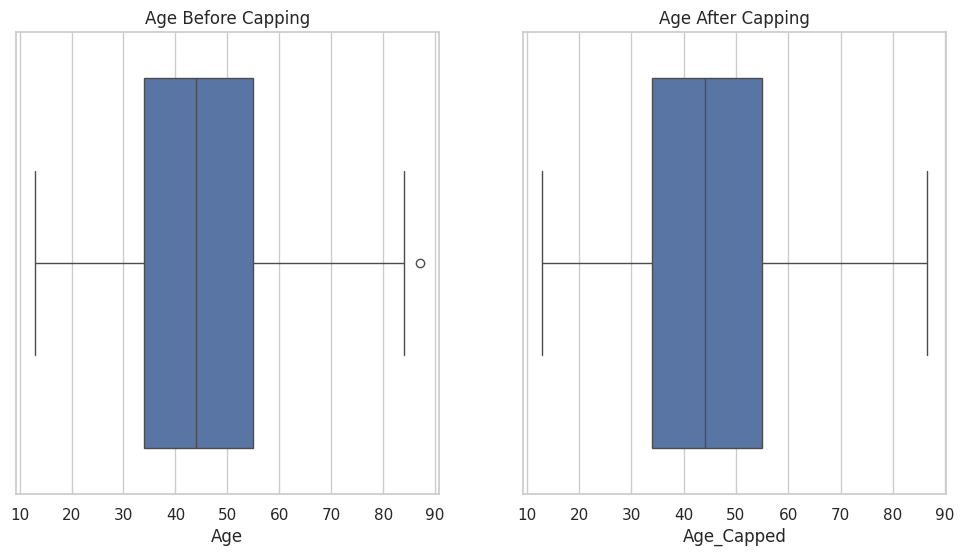

In [51]:
# Visualize before and after
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df_clean, x='Age', ax=axes[0])
axes[0].set_title('Age Before Capping')
sns.boxplot(data=df_clean, x='Age_Capped', ax=axes[1])
axes[1].set_title('Age After Capping')
plt.show()

In [52]:
# Update df to use capped column
df_clean['Age'] = df_clean['Age_Capped']
df_clean.drop('Age_Capped', axis=1, inplace=True)

In [53]:
# Summary stats after capping
print("Age Summary After Capping:\n", df_clean['Age'].describe())
print(f"Outliers capped: Below {lower_bound:.1f} or above {upper_bound:.1f}")

Age Summary After Capping:
 count   12928.00
mean       44.35
std        12.71
min        13.00
25%        34.00
50%        44.00
75%        55.00
max        86.50
Name: Age, dtype: float64
Outliers capped: Below 2.5 or above 86.5


##>>Exploring Research Question

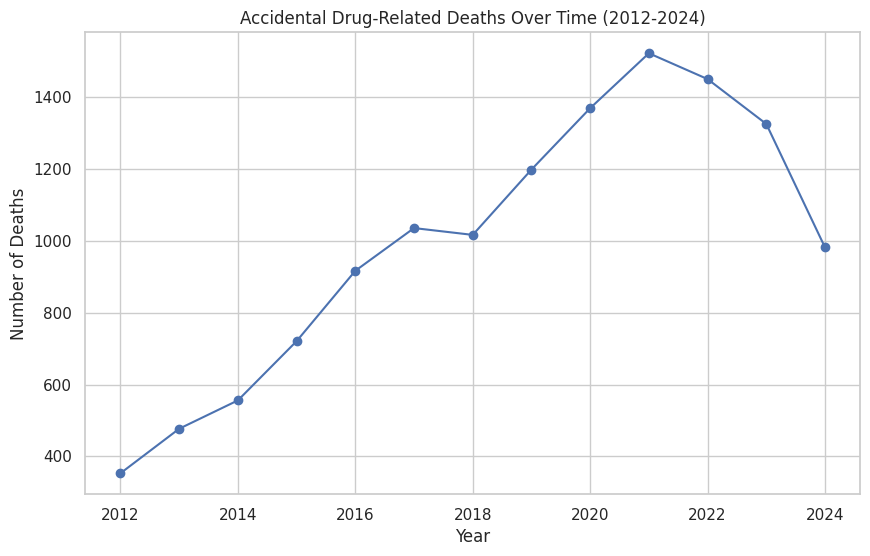

In [54]:
# RQ1: How have accidental drug-related deaths changed over time from 2012 to 2024?
deaths_per_year = df_clean.groupby('Year').size()
plt.figure(figsize=(10, 6))
deaths_per_year.plot(kind='line', marker='o')
plt.title('Accidental Drug-Related Deaths Over Time (2012-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

In [55]:
# RQ2: Is there an association between demographic factors (age, sex, race, ethnicity) and the likelihood of fentanyl involvement?
# Chi-square test for categorical demographics vs. Fentanyl involvement
demographics = ['Sex', 'Race', 'Ethnicity']
for demo in demographics:
    contingency_table = pd.crosstab(df_clean[demo], df_clean['Fentanyl'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test for {demo} vs. Fentanyl: Chi2={chi2:.2f}, p={p:.4f}")
    if p < 0.05:
        print(f"  Significant association found.")
    else:
        print(f"  No significant association.")

Chi-square test for Sex vs. Fentanyl: Chi2=108.92, p=0.0000
  Significant association found.
Chi-square test for Race vs. Fentanyl: Chi2=191.74, p=0.0000
  Significant association found.
Chi-square test for Ethnicity vs. Fentanyl: Chi2=194.36, p=0.0000
  Significant association found.


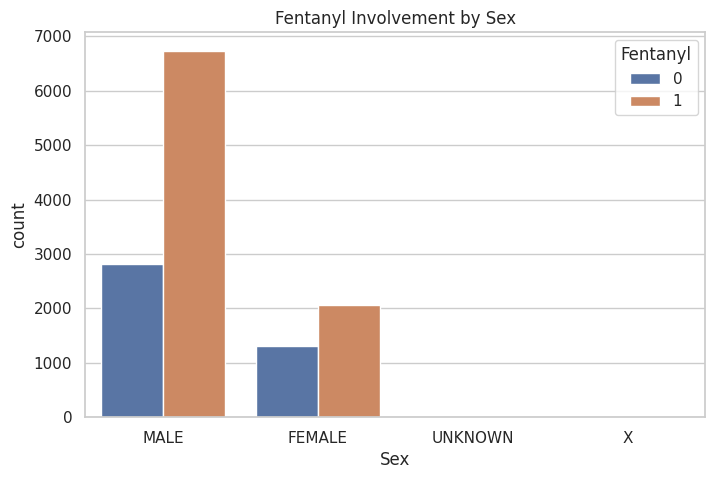

In [56]:
# Visualize association (e.g., for Sex)
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='Sex', hue='Fentanyl')
plt.title('Fentanyl Involvement by Sex')
plt.show()

In [63]:
# RQ3: Are certain counties or cities experiencing disproportionately high rates of multi-drug involvement deaths?
# Calculate rates by county
county_rates = df_clean.groupby('Residence County')['Multi_Drug_Involved'].mean() * 100  # Percentage
county_rates = county_rates.sort_values(ascending=False)
print("Top Counties by Multi-Drug Involvement Rate:\n", county_rates.head(15))

Top Counties by Multi-Drug Involvement Rate:
 Residence County
AROOSTOOK         100.00
BALTIMORE         100.00
BENNINGTON        100.00
BREVARD           100.00
BECKHAM           100.00
BERKELEY          100.00
CLARKE            100.00
CLAY              100.00
CLINTON           100.00
CHESAPEAKE CITY   100.00
BUCKS             100.00
DALLAS            100.00
DAVIESS           100.00
DENVER            100.00
DELTA             100.00
Name: Multi_Drug_Involved, dtype: float64


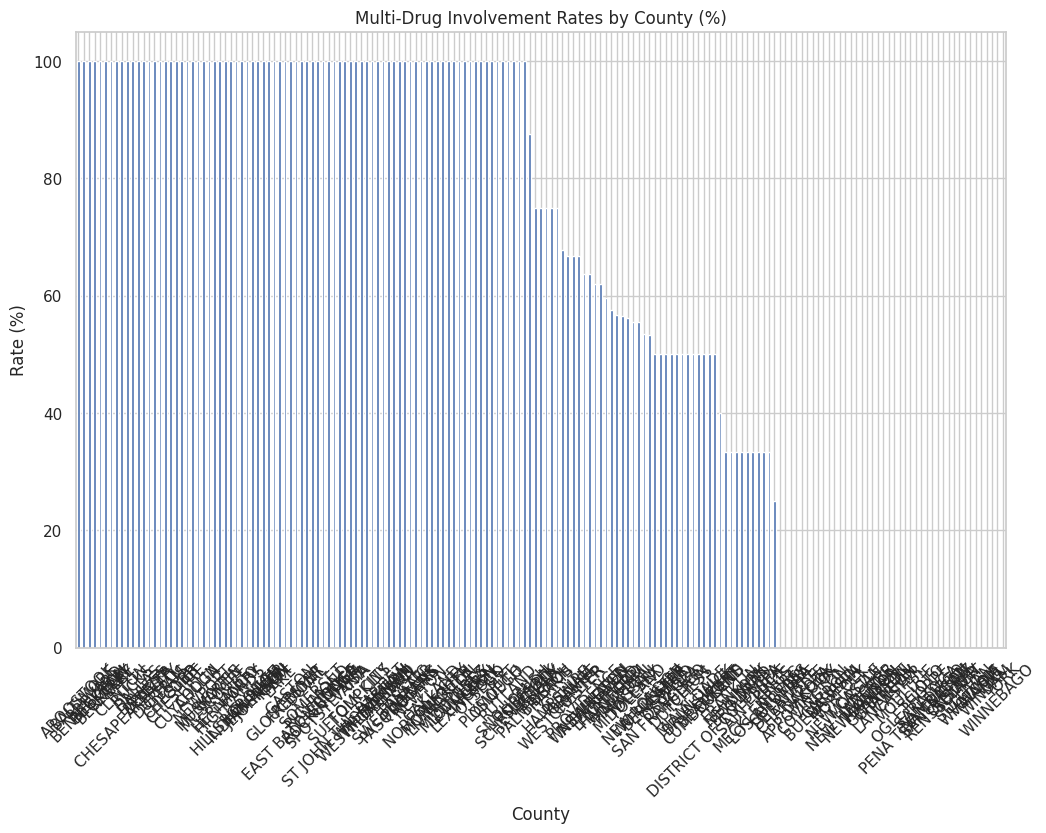

In [62]:
# Visualize
plt.figure(figsize=(12, 8))
county_rates.plot(kind='bar')
plt.title('Multi-Drug Involvement Rates by County (%)')
plt.xlabel('County')
plt.ylabel('Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [64]:
# RQ4: Does age differ significantly between deaths involving opioids and those not involving opioids?
# T-test for age difference
opioid_ages = df_clean[df_clean['Opioids_Involved'] == 1]['Age'].dropna()
non_opioid_ages = df_clean[df_clean['Opioids_Involved'] == 0]['Age'].dropna()

t_stat, p_value = stats.ttest_ind(opioid_ages, non_opioid_ages)
print(f"T-test for Age Difference (Opioids vs. Non-Opioids): t={t_stat:.2f}, p={p_value:.4f}")
if p_value < 0.05:
    print("  Significant difference in ages.")
else:
    print("  No significant difference in ages.")

T-test for Age Difference (Opioids vs. Non-Opioids): t=-14.40, p=0.0000
  Significant difference in ages.


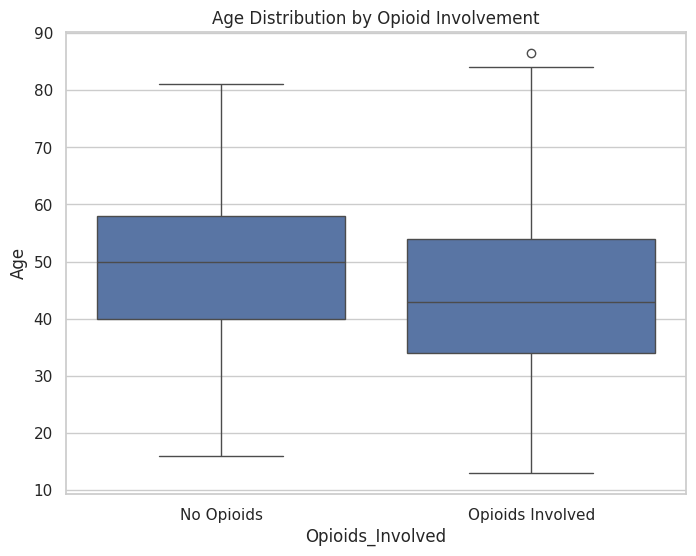

In [65]:
# Visualize
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean, x='Opioids_Involved', y='Age')
plt.title('Age Distribution by Opioid Involvement')
plt.xticks([0, 1], ['No Opioids', 'Opioids Involved'])
plt.show()

##>>Additional Exploration


--- Drug Indicator Columns ---
['Heroin', 'Heroin death certificate (DC)', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Opiate NOS', 'Any Opioid', 'Opioids_Involved', 'Multi_Drug_Involved']


/tmp/ipython-input-3458272789.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  drug_data = df_clean[drug_cols].replace({"Yes":1, "Y":1, "No":0, "N":0}).fillna(0)


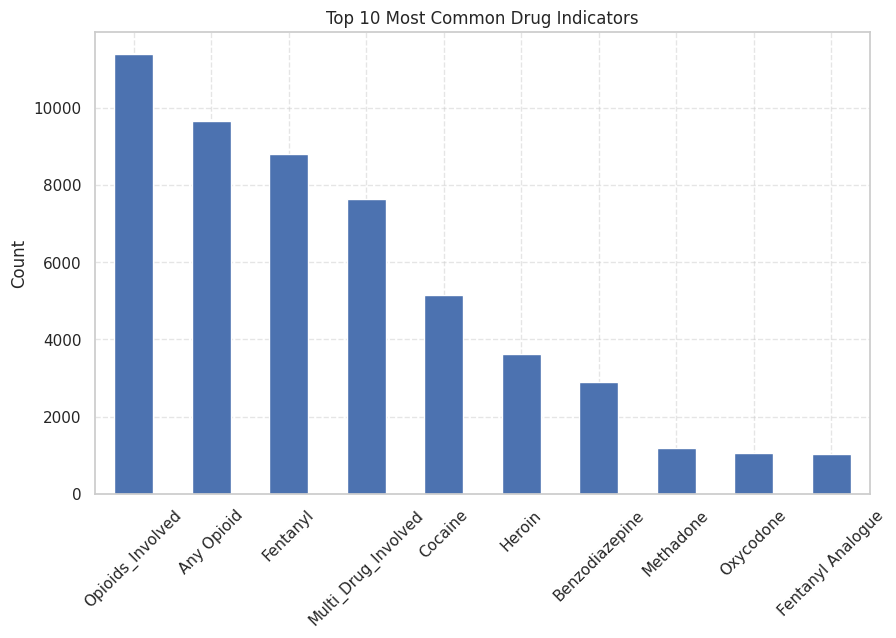

In [66]:
# Identify drug indicator columns (Yes/No or Y/N)
drug_cols = []

for col in df_clean.columns:
    if df_clean[col].dropna().isin(["Yes", "No", "Y", "N", 1, 0]).all():
        drug_cols.append(col)

print("\n--- Drug Indicator Columns ---")
print(drug_cols)

# Convert Yes/No → 1/0
drug_data = df_clean[drug_cols].replace({"Yes":1, "Y":1, "No":0, "N":0}).fillna(0)

# Top 10 drugs by frequency
drug_sums = drug_data.sum().sort_values(ascending=False).head(10)

# ---- C. Plot top 10 drugs ----
plt.figure(figsize=(10,6))
drug_sums.plot(kind="bar")
plt.title("Top 10 Most Common Drug Indicators")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

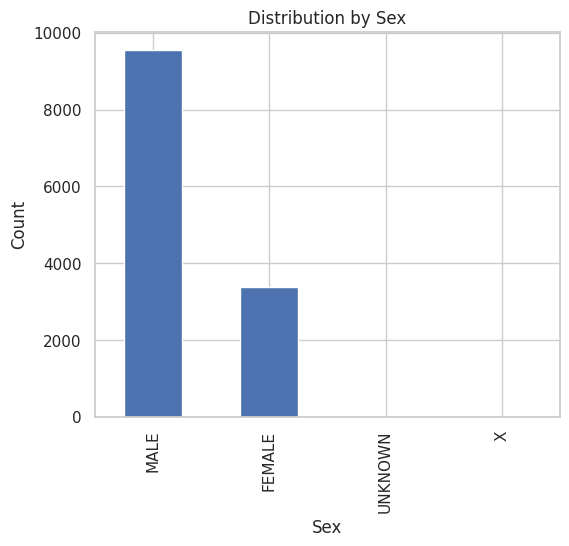

In [67]:
# ---- Sex distribution ----
plt.figure(figsize=(6,5))
df_clean["Sex"].value_counts().plot(kind="bar")
plt.title("Distribution by Sex")
plt.ylabel("Count")
plt.show()

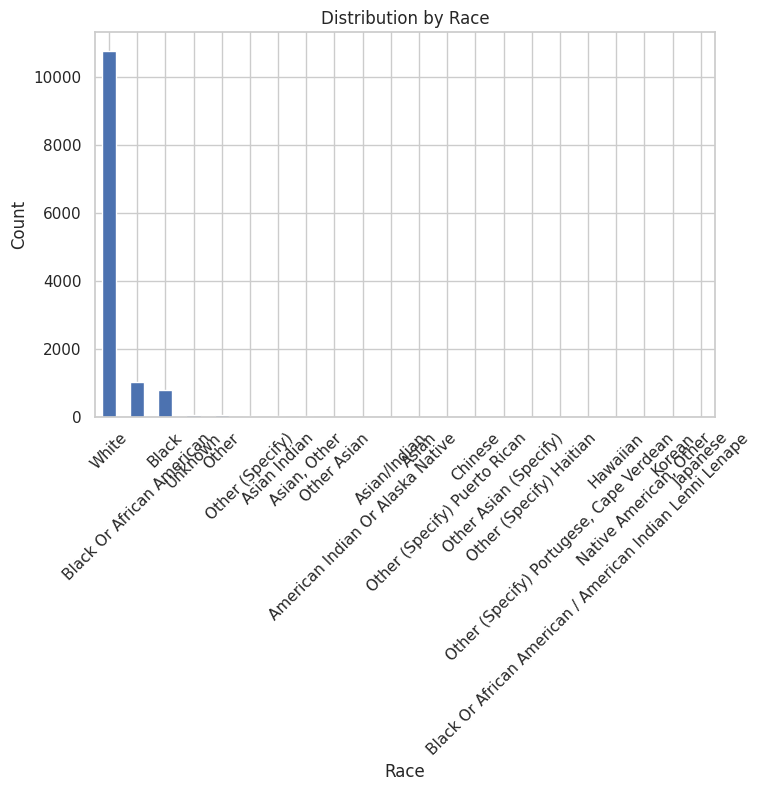

In [68]:
# ---- Race distribution ----
plt.figure(figsize=(8,5))
df_clean["Race"].value_counts().plot(kind="bar")
plt.title("Distribution by Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

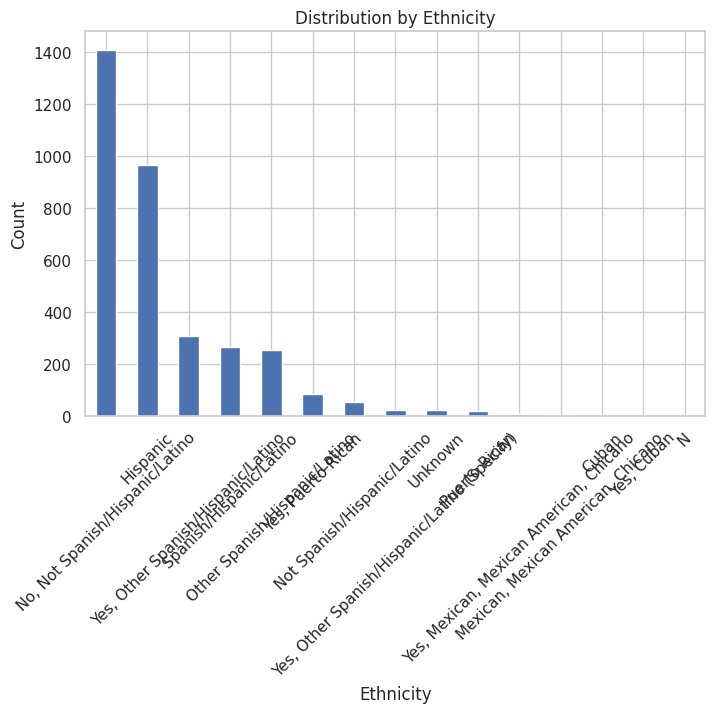

In [69]:
# ---- Ethnicity distribution ----
plt.figure(figsize=(8,5))
df_clean["Ethnicity"].value_counts().plot(kind="bar")
plt.title("Distribution by Ethnicity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

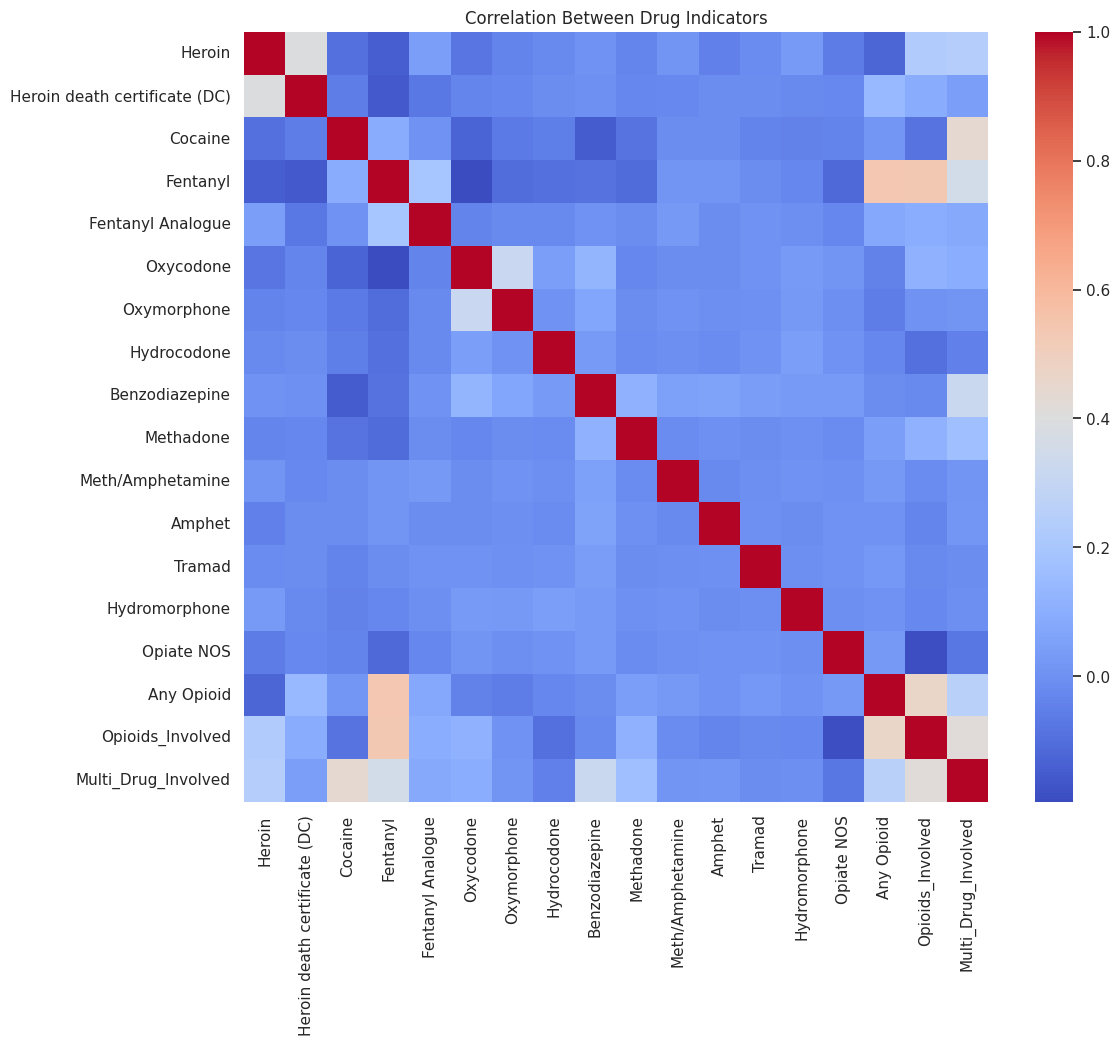

In [70]:
#Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(drug_data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Between Drug Indicators")
plt.show()

##>>Hypothesis Testing

In [74]:
# Calculate yearly proportions of fentanyl-involved deaths
yearly_fentanyl = df_clean.groupby('Year')['Fentanyl'].agg(['sum', 'count'])
yearly_fentanyl['Proportion'] = yearly_fentanyl['sum'] / yearly_fentanyl['count']
print("Yearly Fentanyl Involvement Proportions:\n", yearly_fentanyl)

Yearly Fentanyl Involvement Proportions:
        sum  count  Proportion
Year                         
2012    13    353        0.04
2013    36    477        0.08
2014    74    556        0.13
2015   186    721        0.26
2016   482    917        0.53
2017   675   1036        0.65
2018   760   1017        0.75
2019   978   1199        0.82
2020  1155   1370        0.84
2021  1301   1523        0.85
2022  1252   1451        0.86
2023  1123   1326        0.85
2024   762    982        0.78


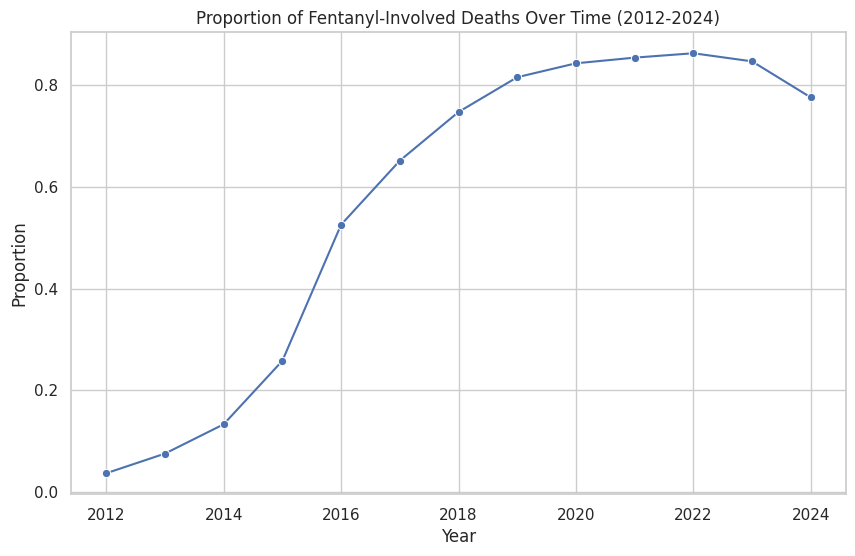

In [75]:
# Visualize the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_fentanyl, x=yearly_fentanyl.index, y='Proportion', marker='o')
plt.title('Proportion of Fentanyl-Involved Deaths Over Time (2012-2024)')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.grid(True)
plt.show()


In [76]:
# Test the hypothesis: Chi-square test for trend (using proportions_ztest for simplicity)
# Treat years as ordinal and test if proportion increases
# Alternative: Use logistic regression for trend
from statsmodels.formula.api import logit

In [77]:
# Prepare data for logistic regression (trend over time)
df_trend = df_clean[['Year', 'Fentanyl']].dropna()
df_trend['Year_Centered'] = df_trend['Year'] - df_trend['Year'].min()  # Center for interpretability

In [78]:
# Fit logistic regression: Fentanyl ~ Year_Centered
model = logit('Fentanyl ~ Year_Centered', data=df_trend).fit(disp=False)
print("Logistic Regression Summary:\n", model.summary())

Logistic Regression Summary:
                            Logit Regression Results                           
Dep. Variable:               Fentanyl   No. Observations:                12928
Model:                          Logit   Df Residuals:                    12926
Method:                           MLE   Df Model:                            1
Date:                Thu, 04 Dec 2025   Pseudo R-squ.:                  0.1886
Time:                        16:40:37   Log-Likelihood:                -6572.1
converged:                       True   LL-Null:                       -8099.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.5873      0.050    -31.574      0.000      -1.686      -1.489
Year_Centered     0.3538      0.007     48.546      0.000       0.339       0.368


In [79]:
# Extract p-value for Year_Centered coefficient
p_value = model.pvalues['Year_Centered']
print(f"P-value for trend (Year_Centered): {p_value:.4f}")

P-value for trend (Year_Centered): 0.0000


##>>Result

In [80]:
# Decision
if p_value < 0.05:
    print("Reject H₀: The proportion of fentanyl-involved deaths has increased significantly over time.")
else:
    print("Fail to reject H₀: No significant increase in fentanyl-involved deaths over time.")

Reject H₀: The proportion of fentanyl-involved deaths has increased significantly over time.
